In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

mushroom_data = pd.read_csv('/content/mushroom.csv')
mushroom_data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [ ]:
# Drop unnecessary columns (e.g., index column)
mushroom_data_cleaned = mushroom_data.drop(columns=['Unnamed: 0'])

In [ ]:
mushroom_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [ ]:
mushroom_data_cleaned.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


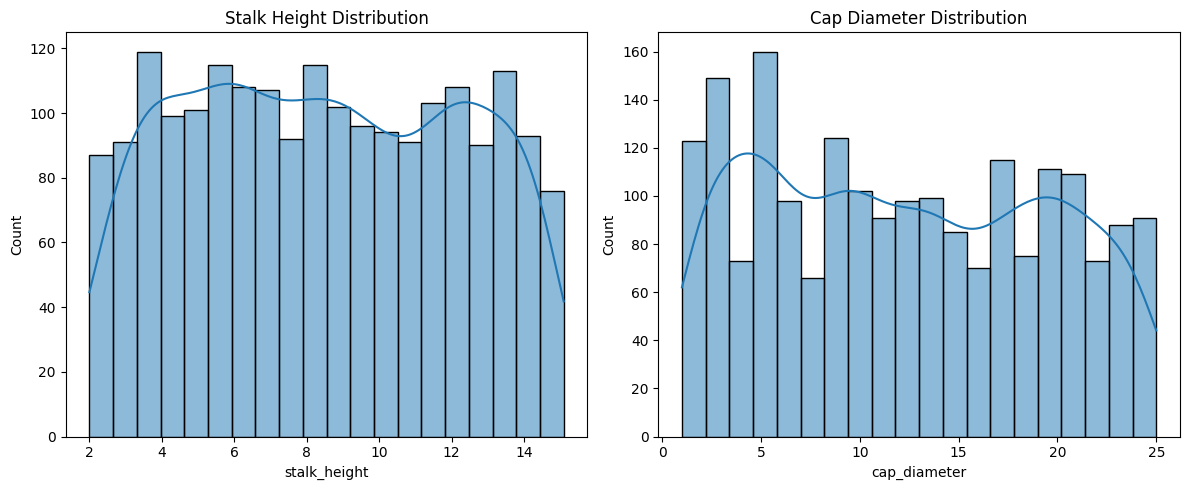

In [ ]:
# Ploting histograms for numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(mushroom_data_cleaned['stalk_height'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Stalk Height Distribution')

sns.histplot(mushroom_data_cleaned['cap_diameter'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Cap Diameter Distribution')

plt.tight_layout()
plt.show()


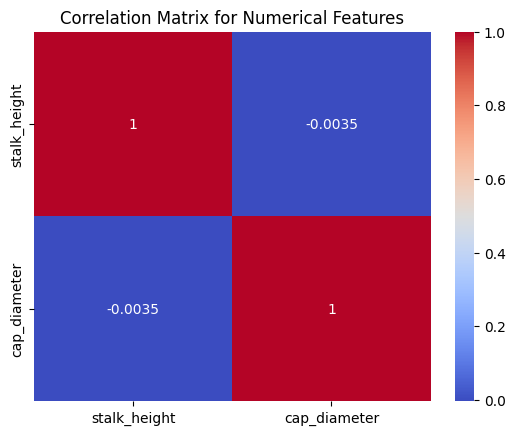

In [ ]:
# Correlation matrix for numerical features
corr_matrix = mushroom_data_cleaned[['stalk_height', 'cap_diameter']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [ ]:
# Encode categorical variables using get_dummies for one-hot encoding
mushroom_encoded = pd.get_dummies(mushroom_data_cleaned, drop_first=True)

# Split the dataset into features (X) and target (y)
X = mushroom_encoded.drop(columns=['class_poisonous'])  # Features
y = mushroom_encoded['class_poisonous']  # Target variable (1: poisonous, 0: edible)

# Spliting the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


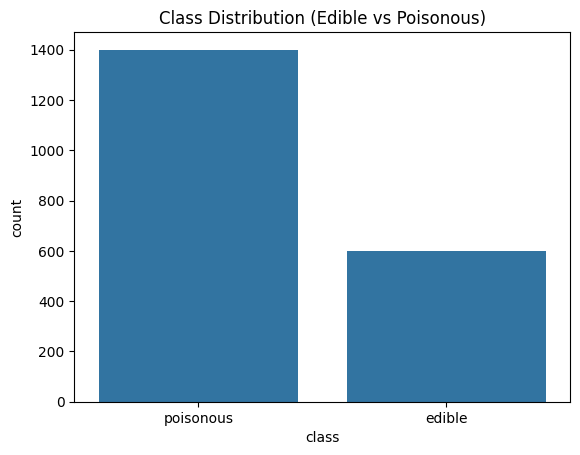

In [ ]:
# class distribution
sns.countplot(x='class', data=mushroom_data_cleaned)
plt.title('Class Distribution (Edible vs Poisonous)')
plt.show()


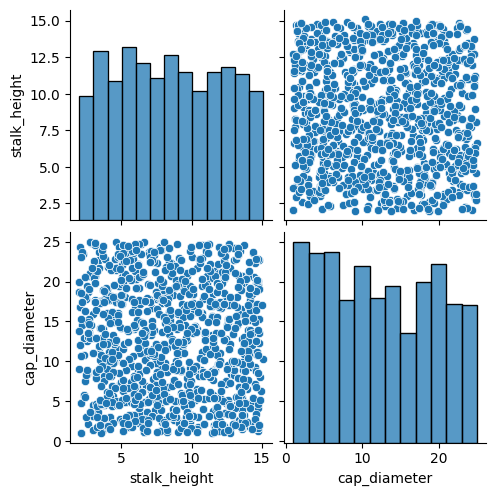

In [ ]:
# Pair plot for some features (to observe distributions and relationships)
sns.pairplot(mushroom_data_cleaned[['stalk_height', 'cap_diameter', 'class']])
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train the SVM model (using a linear kernel by default)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6675
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


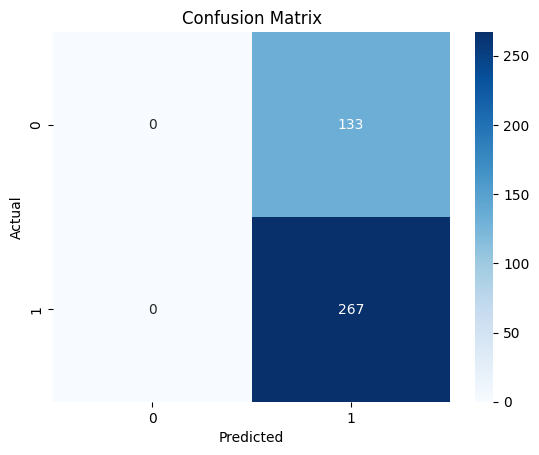

In [29]:
# Task 5: Visualization of SVM Results
# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Task 6: Parameter Tuning and Optimization
from sklearn.model_selection import GridSearchCV
# 1. Experiment with different SVM hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid_search.fit(X_train, y_train)

# 2. Best parameters and evaluation
print("Best Parameters:\n", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters:
 {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Model Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.76      0.78       133
        True       0.88      0.91      0.89       267

    accuracy                           0.86       400
   macro avg       0.84      0.83      0.84       400
weighted avg       0.86      0.86      0.86       400



In [32]:
#7   Define a function to train and evaluate SVM with different kernels
def evaluate_svm_kernel(kernel_type):
    # Create an SVM model with the specified kernel and balanced class weights
    svm_model = SVC(kernel=kernel_type, class_weight='balanced', random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Print the performance report with zero_division handling
    print(f"Performance with {kernel_type} kernel:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred, zero_division=1))  # zero_division handles undefined metrics
    print("-" * 50)

# Evaluate SVM with linear kernel
evaluate_svm_kernel('linear')

# Evaluate SVM with polynomial kernel
evaluate_svm_kernel('poly')

# Evaluate SVM with RBF kernel
evaluate_svm_kernel('rbf')

# Evaluate SVM with sigmoid kernel


Performance with linear kernel:
Accuracy: 0.58
              precision    recall  f1-score   support

       False       0.40      0.57      0.47       133
        True       0.73      0.58      0.65       267

    accuracy                           0.58       400
   macro avg       0.57      0.58      0.56       400
weighted avg       0.62      0.58      0.59       400

--------------------------------------------------
Performance with poly kernel:
Accuracy: 0.65
              precision    recall  f1-score   support

       False       0.47      0.32      0.38       133
        True       0.71      0.82      0.76       267

    accuracy                           0.65       400
   macro avg       0.59      0.57      0.57       400
weighted avg       0.63      0.65      0.63       400

--------------------------------------------------
Performance with rbf kernel:
Accuracy: 0.56
              precision    recall  f1-score   support

       False       0.40      0.61      0.48       133

In [ ]:
''' 2. Analysis of SVM Strengths and Weaknesses:
Strengths:
Handles non-linearity:                      SVM, especially with RBF or polynomial kernels, is effective for non-linear datasets like this one.
Effective for high-dimensional spaces:      SVMs perform well even when the number of dimensions is greater than the number of samples,
                                            which is useful for datasets with many features.
Robust to overfitting                       With proper tuning of the regularization parameter C, SVMs are less prone to overfitting.


Weaknesses:
 Computationally expensive:                 SVMs, particularly with non-linear kernels, are resource-intensive as they require optimization in high-dimensional space.
Sensitive to parameter tuning:              SVMs need careful tuning of C, gamma, and kernel choice. Misconfiguration can lead to poor performance.
Not well suited for large datasets:         With very large datasets, the training time and memory requirements increase, making SVMs less practical.


3. Practical Implications of SVM in Real-World Classification Tasks:
Medical Diagnosis: In tasks like classifying whether a mushroom is poisonous or not, SVM's ability to handle non-linearity and
robustness to overfitting makes it useful for medical diagnosis or food safety classification, where precision and accuracy are critical.

Small-to-medium datasets: SVMs are well-suited for scenarios where you have a limited number of training examples but high-dimensional features
(e.g., text classification, gene expression data).

Binary classification: SVMs excel at binary classification tasks but may struggle with large-scale multi-class classification unless carefully tuned.

Scalability challenges: In large-scale applications like real-time recommendation systems, SVM may become computationally infeasible,
and other methods (e.g., decision trees or deep learning) might be preferred for speed and scalability.
